# F2 FITS MAY HAVE BEEN WITH 7E10 MASS CUTOFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from Helpers import get_fit_chains, get_chain

In [2]:
%matplotlib inline

In [3]:
phases = 25

In [4]:
init_guess = np.array([1.0, 1.0, 1.0, 10.0, 40.0, 100.0, 1.0])
init_guess_F2 = np.array([1.0, 1.0, 1.0, 10.0, 40.0, 100.0, 1.0, 1.0])

z8_1E11_params, z8_1E11_chain = get_fit_chains('Fits_z8/Both_Best_Fits.npy', init_guess)
z5_1E11_params, z5_1E11_chain = get_fit_chains('Fits_z5/Both_Best_Fits.npy', init_guess)
z8_7E10_params, z8_7E10_chain = get_fit_chains('Fits_z8/7E10_Best_Fits.npy', init_guess)
z5_6E11_params, z5_6E11_chain = get_fit_chains('Fits_z5/6E11_Best_Fits.npy', init_guess) # Really 6.34E11

# All of the following are z8, mass cut 1E11
power_params, power_chain = get_fit_chains('Fits_z8/Power_Best_Fits.npy', init_guess)
bispec_params, bispec_chain = get_fit_chains('Fits_z8/Bispec_Best_Fits.npy', init_guess)
F2_params, F2_chain = get_fit_chains('Fits_z8/F2_Best_Fits.npy', init_guess_F2)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [5]:
rescale = 3/2
# rescale = np.average(z5_6E11_params[:,3])/np.average(z8_1E11_params[:,3])

new_z5_params = np.copy(z5_6E11_params)
new_z5_params[:,3] *= rescale
new_z5_params[:,4] *= (rescale)**2
new_z5_params[:,5] *= (rescale)**3
new_z5_params[:,6] *= (rescale)**2
new_z5_chain = get_chain(new_z5_params)

Removed no burn in


In [6]:
g = plots.getSubplotPlotter(width_inch=7)

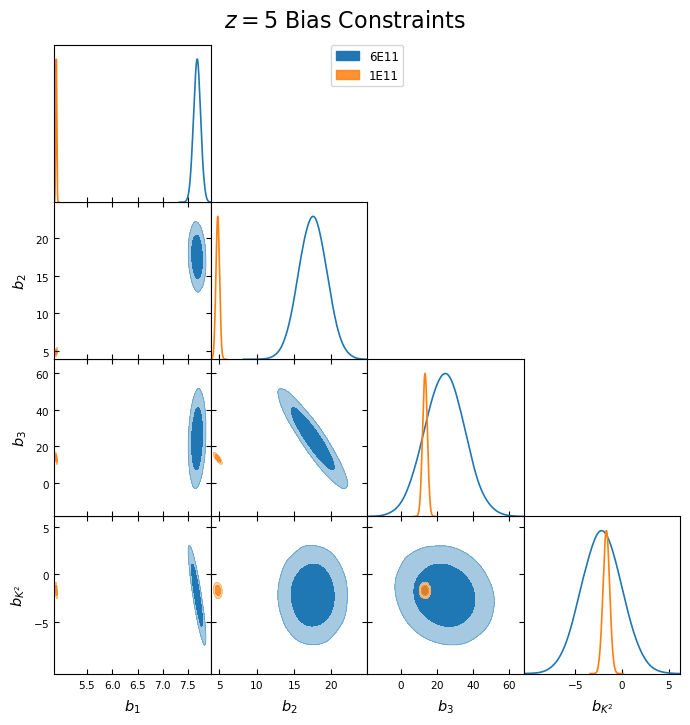

In [7]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z5_6E11_chain] + [z5_1E11_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=['6E11', '1E11'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"$z=5$ Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

In [8]:
np.average(z5_1E11_params[:,6]) / np.std(z5_1E11_params[:,6])

np.float64(-4.9322182647838515)

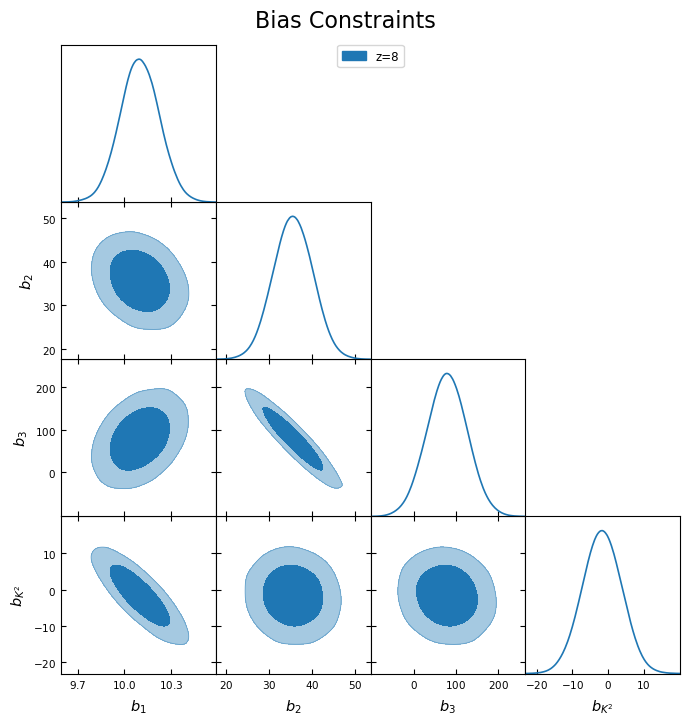

In [9]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z8_1E11_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=['z=8'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

In [10]:
np.average(z8_1E11_params[:,6])*(2/3)**2

np.float64(-0.7488621575800789)

In [11]:
np.average(z5_6E11_params[:,6])

np.float64(-2.1888664329037355)

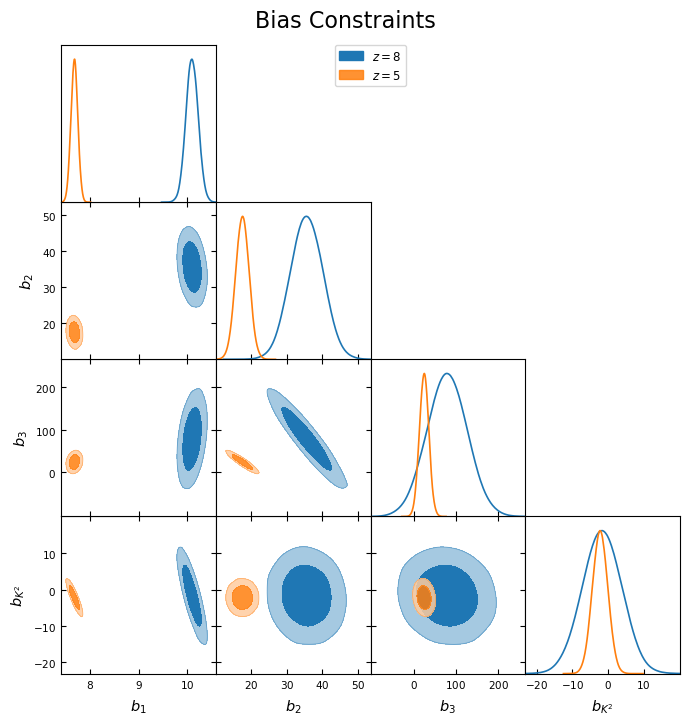

In [12]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z8_1E11_chain] + [z5_6E11_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=[r'$z=8$', r'$z=5$'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

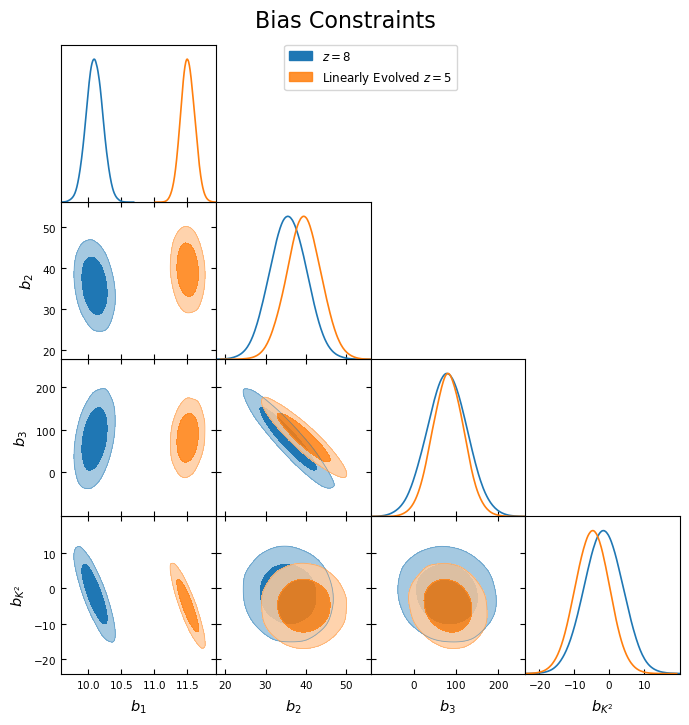

In [13]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z8_1E11_chain] + [new_z5_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=[r'$z=8$', r'Linearly Evolved $z=5$'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

In [14]:
np.average(F2_params[:,6]) / np.std(F2_params[:,6])

np.float64(-0.24551246334024268)

In [15]:
np.average(F2_params[:,7]) - 1

np.float64(0.060405517874978276)

In [16]:
np.std(F2_params[:,7])

np.float64(0.7248224999258499)

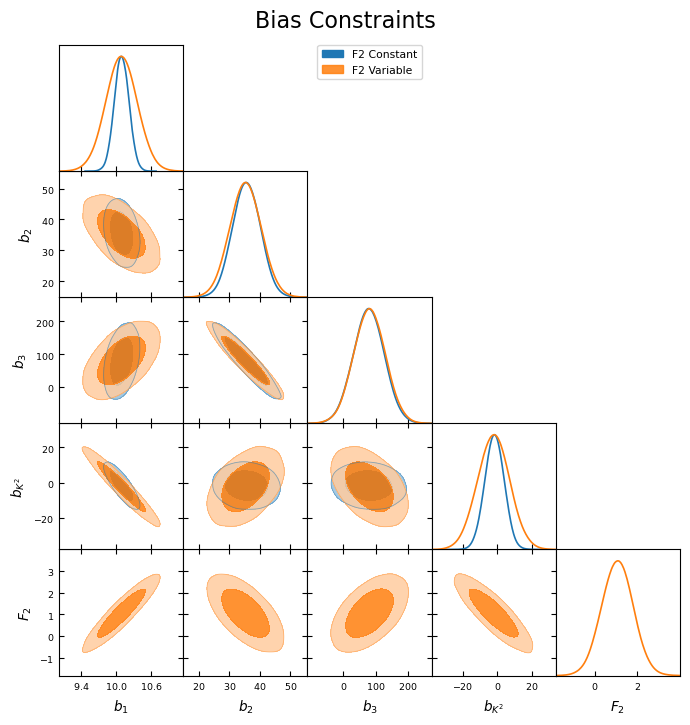

In [17]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z8_1E11_chain] + [F2_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}', 'F_2'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=['F2 Constant', 'F2 Variable'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

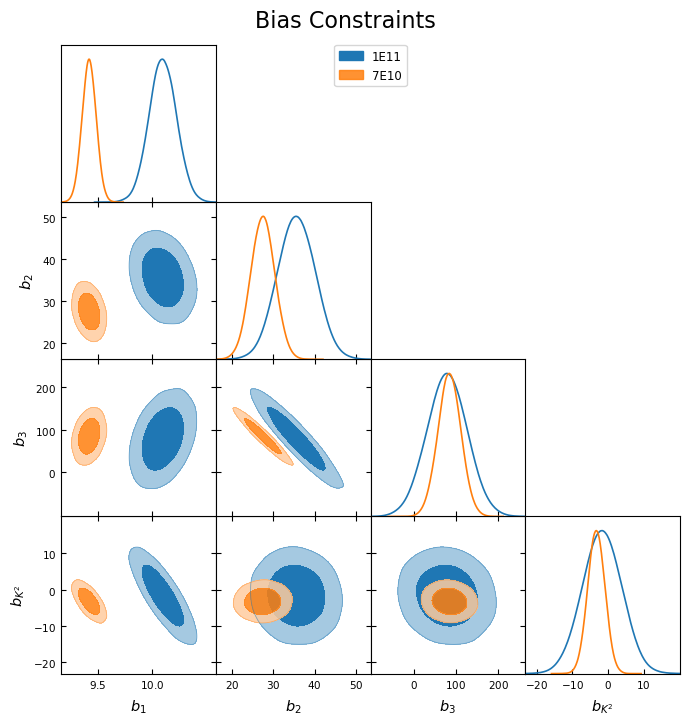

In [18]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([z8_1E11_chain] + [z8_7E10_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1)], contour_colors=[cmap(0), cmap(1)],
                legend_labels=['1E11', '7E10'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

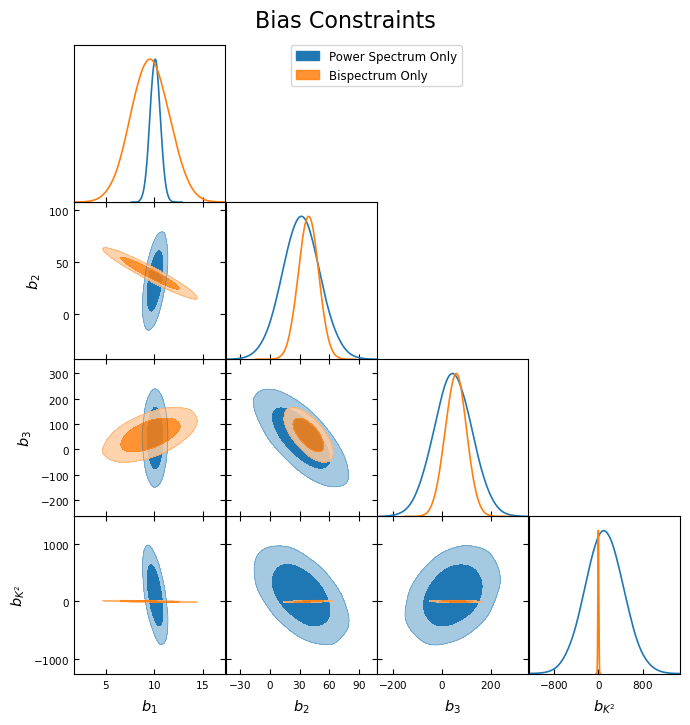

In [19]:
cmap = plt.get_cmap("tab10")
g.triangle_plot([power_chain] + [bispec_chain],
                ['b_1','b_2', 'b_3', 'b_{K^2}'], 
                colors=[cmap(0), cmap(1), cmap(2)], contour_colors=[cmap(0), cmap(1), cmap(2)],
                legend_labels=['Power Spectrum Only', 'Bispectrum Only', 'Both'],
                filled=True, contour_lws=1.2, contour_ls = '-')
g.fig.suptitle(r"Bias Constraints",
               y = 1.03, fontsize=16)
plt.show()

In [20]:
(6+4)%7

3

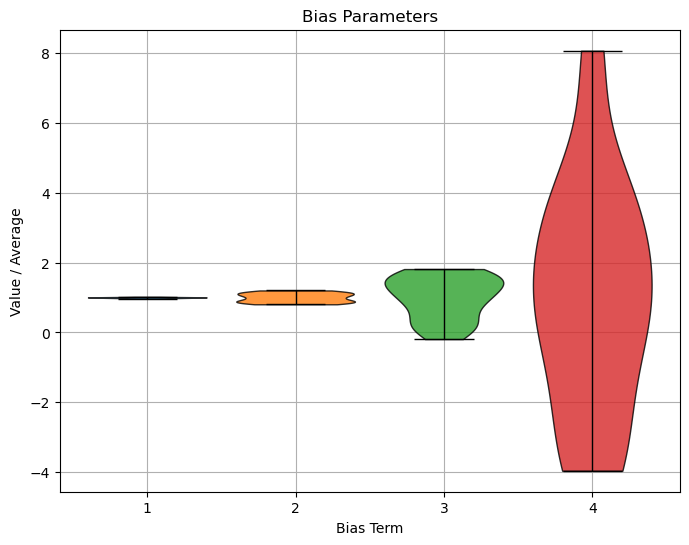

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

positions = np.arange(-2, 5)          # -2, −1, 0, 1, 2, 3
colors    = plt.cm.tab10.colors[:len(z8_1E11_params.T)]   # five distinct hues

for i in np.arange(4)+3:#range(len(ind_fit_params.T)):
    v  = ax.violinplot(z8_1E11_params[:, i]/np.average(z8_1E11_params[:, i]),
                       positions=[positions[i]],
                       #showmeans=False,
                       #showmedians=True,
                       widths=0.8)
    # Color the violin
    for body in v['bodies']:
        body.set_facecolor(colors[(i+4)%len(z8_1E11_params.T)])
        body.set_edgecolor('black')
        body.set_alpha(0.8)
    for part in ('cbars', 'cmins', 'cmaxes'):
        v[part].set_color('black')
        v[part].set_linewidth(1.0)
    for key, item in v.items():
        # item is either a single artist (e.g., cmedians) or a list (bodies)
        if isinstance(item, list):
            for artist in item:
                artist.set_zorder(2)      # any number > 0 works
        else:
            item.set_zorder(2)
    #v['cmedians'].set_color('black')  # dark median line

# plt.scatter(positions, best_params * np.array(initial_guess) / ind_init_guess,
#            color = 'k', label = 'Average Bispectrum Fits', zorder=3)

# plt.legend()
ax.set_xticks(positions[3:])
ax.set_xlabel('Bias Term')
ax.set_ylabel('Value / Average')
ax.set_title('Bias Parameters')
plt.grid(zorder=0)
plt.show()